# 1 задание 1 эксперимент 

In [41]:
%%bash
grep "KiB Mem : " 1/exp1/top.log | awk '{print $6 / 1024}' > 1/exp1/mem_info
grep "KiB Swap: " 1/exp1/top.log | awk '{print $5 / 1024}' > 1/exp1/swap_info

In [42]:
import numpy as np
from matplotlib import pyplot as plt

def get_plot(mem_info_path, swap_info_path):
    mem_file = open(mem_info_path, "r")
    mem_data = np.array((list(map(lambda x: float(x.replace(",", ".")), mem_file.read().split("\n")[:-1]))))
    mem_file.close()
    
    swap_file = open(swap_info_path, "r")
    swap_data = np.array((list(map(lambda x: float(x.replace(",", ".")), swap_file.read().split("\n")[:-1]))))
    swap_file.close()

    osx = np.arange(1, 2 * len(mem_data), 2)
    plt.figure(figsize=(15, 7))    
    plt.plot(osx, mem_data, 'red', label='free_mem')
    plt.plot(osx, swap_data, 'blue', label='free_swap')
    plt.xlabel("time in seconds")
    plt.ylabel("free memory in mBs")
    plt.legend()

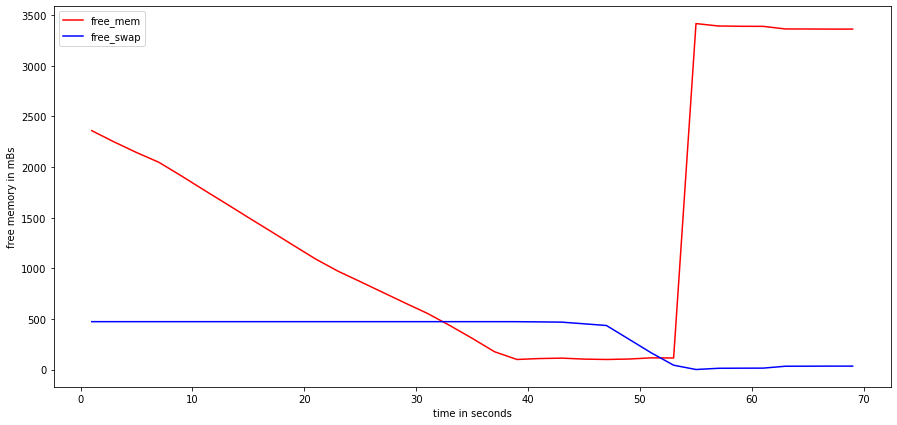

In [44]:
get_plot("1/exp1/mem_info", 
         "1/exp1/swap_info")

In [45]:
%%bash
cat 1/exp1/dmesg.txt

[  198.252330] mem.sh invoked oom-killer: gfp_mask=0x100cca(GFP_HIGHUSER_MOVABLE), order=0, oom_score_adj=0
[  198.252334] CPU: 0 PID: 1592 Comm: mem.sh Tainted: G           O      5.4.0-53-generic #59~18.04.1-Ubuntu
[  198.252527] [   1592]  1000  1592   868607   863470  6995968      167             0 mem.sh
[  198.252535] oom-kill:constraint=CONSTRAINT_NONE,nodemask=(null),cpuset=/,mems_allowed=0,global_oom,task_memcg=/,task=mem.sh,pid=1592,uid=1000
[  198.252542] Out of memory: Killed process 1592 (mem.sh) total-vm:3474428kB, anon-rss:3453880kB, file-rss:0kB, shmem-rss:0kB, UID:1000 pgtables:6832kB oom_score_adj:0
[  198.520487] oom_reaper: reaped process 1592 (mem.sh), now anon-rss:0kB, file-rss:0kB, shmem-rss:0kB


In [72]:
%%bash
echo "Количество элементов в массиве: $(tail -1 1/exp1/report.log)"

Количество элементов в массиве: 44200000
